In [2]:
install.packages("factoextra")

also installing the dependencies ‘viridis’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘cluster’, ‘dendextend’, ‘FactoMineR’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
install.packages("Hmisc")

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [20]:
install.packages("e1071")

also installing the dependency ‘proxy’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(readxl)
library(httr)
library(MASS)
library(caret)
library(tibble)
library(factoextra)
library(ggpubr)

In [12]:
GET("http://www.ime.usp.br/~jmsinger/MorettinSinger/inibina.xls", write_disk(tf <- tempfile(fileext = ".xls")))
inibina = read_excel(tf)
str(inibina)

Response [https://www.ime.usp.br/~jmsinger/MorettinSinger/inibina.xls]
  Date: 2021-11-10 00:57
  Status: 200
  Content-Type: application/vnd.ms-excel
  Size: 8.7 kB
<ON DISK>  /tmp/RtmpsAhVK5/file4e98c943e.xlsNULL

tibble [32 × 4] (S3: tbl_df/tbl/data.frame)
 $ ident   : num [1:32] 1 2 3 4 5 6 7 8 9 10 ...
 $ resposta: chr [1:32] "positiva" "positiva" "positiva" "positiva" ...
 $ inibpre : num [1:32] 54 159.1 98.3 85.3 127.9 ...
 $ inibpos : num [1:32] 65.9 281.1 305.4 434.4 229.3 ...


In [13]:
Hmisc::describe(inibina)

inibina 

 4  Variables      32  Observations
--------------------------------------------------------------------------------
ident 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      32        0       32        1     16.5       11     2.55     4.10 
     .25      .50      .75      .90      .95 
    8.75    16.50    24.25    28.90    30.45 

lowest :  1  2  3  4  5, highest: 28 29 30 31 32
--------------------------------------------------------------------------------
resposta 
       n  missing distinct 
      32        0        2 
                            
Value      negativa positiva
Frequency        13       19
Proportion    0.406    0.594
--------------------------------------------------------------------------------
inibpre 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      32        0       32        1    100.5    67.83    4.139    8.937 
     .25      .50      .75      .90      .95 
  52.403  109.435  148.925  165.4

In [14]:
inibina$inibdif = inibina$inibpos = inibina$inibpre

In [15]:
par(mfrow=c(1,3))

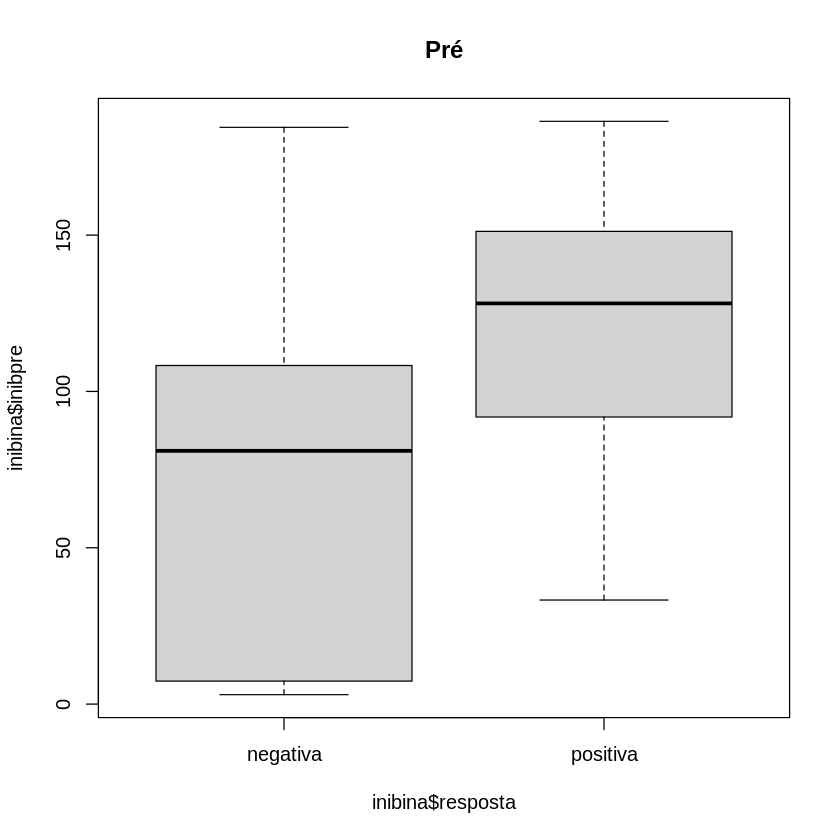

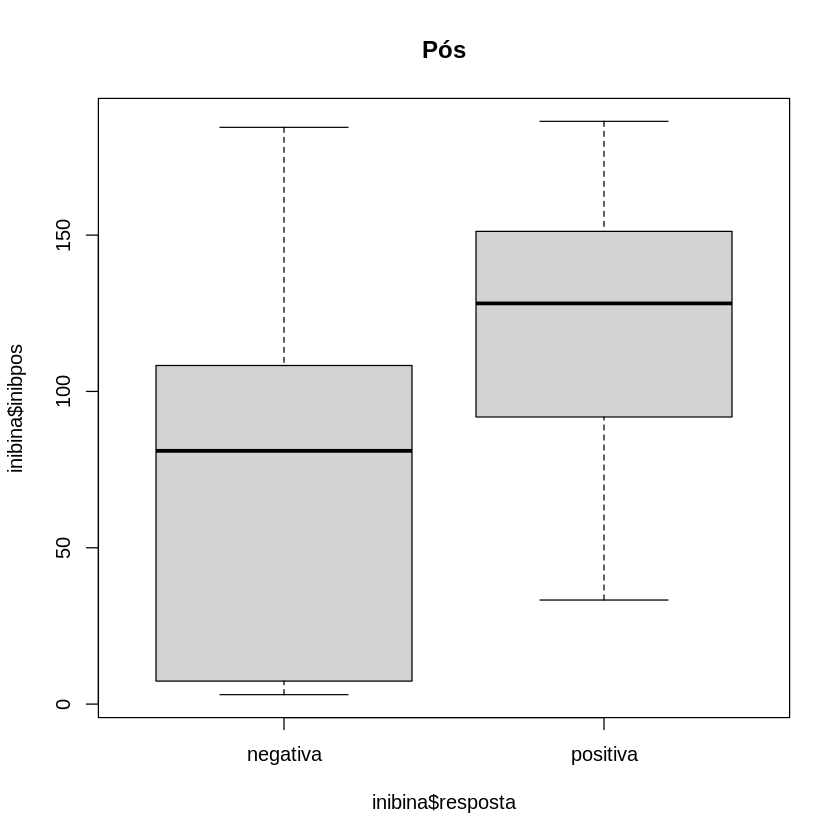

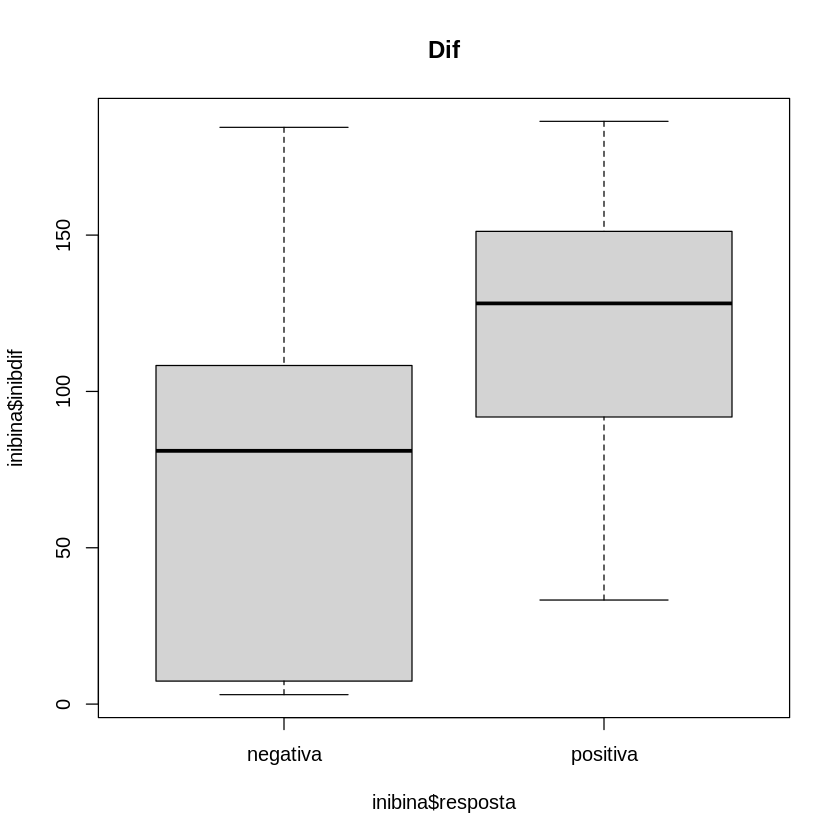

In [16]:
boxplot(inibina$inibpre ~ inibina$resposta, main = "Pré")
boxplot(inibina$inibpos ~ inibina$resposta, main = "Pós")
boxplot(inibina$inibdif ~ inibina$resposta, main = "Dif")

In [21]:
inibina$resposta = as.factor(inibina$resposta)
modLog = glm(resposta ~ inibdif, family = binomial, data = inibina)
predito = predict.glm(modLog, type = "response")
classPred = as.factor(ifelse(predito > 0.5, "positiva", "negativa"))
confusionMatrix(classPred, inibina$resposta, positive = "positiva")

Confusion Matrix and Statistics

          Reference
Prediction negativa positiva
  negativa        6        4
  positiva        7       15
                                          
               Accuracy : 0.6562          
                 95% CI : (0.4681, 0.8143)
    No Information Rate : 0.5938          
    P-Value [Acc > NIR] : 0.2978          
                                          
                  Kappa : 0.2605          
                                          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.7895          
            Specificity : 0.4615          
         Pos Pred Value : 0.6818          
         Neg Pred Value : 0.6000          
             Prevalence : 0.5938          
         Detection Rate : 0.4688          
   Detection Prevalence : 0.6875          
      Balanced Accuracy : 0.6255          
                                          
       'Positive' Class : positiva        


In [ ]:
# Item D

In [25]:
modFisher01 = lda(resposta ~ inibdif, data = inibina, prior = c(0.5, 0.5))
predito = predict(modFisher01)
confusionMatrix(predito$class, inibina$resposta, positive = "positiva")

Confusion Matrix and Statistics

          Reference
Prediction negativa positiva
  negativa        7        5
  positiva        6       14
                                          
               Accuracy : 0.6562          
                 95% CI : (0.4681, 0.8143)
    No Information Rate : 0.5938          
    P-Value [Acc > NIR] : 0.2978          
                                          
                  Kappa : 0.2787          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.7368          
            Specificity : 0.5385          
         Pos Pred Value : 0.7000          
         Neg Pred Value : 0.5833          
             Prevalence : 0.5938          
         Detection Rate : 0.4375          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.6377          
                                          
       'Positive' Class : positiva        


In [27]:
# Item E

In [28]:
modBayes01 = lda(resposta ~ inibdif, data = inibina, prior = c(0.65, 0.35))
predito = predict(modBayes01)
confusionMatrix(predito$class, inibina$resposta, positive = "positiva")

Confusion Matrix and Statistics

          Reference
Prediction negativa positiva
  negativa       11       10
  positiva        2        9
                                         
               Accuracy : 0.625          
                 95% CI : (0.4369, 0.789)
    No Information Rate : 0.5938         
    P-Value [Acc > NIR] : 0.43313        
                                         
                  Kappa : 0.2915         
                                         
 Mcnemar's Test P-Value : 0.04331        
                                         
            Sensitivity : 0.4737         
            Specificity : 0.8462         
         Pos Pred Value : 0.8182         
         Neg Pred Value : 0.5238         
             Prevalence : 0.5938         
         Detection Rate : 0.2812         
   Detection Prevalence : 0.3438         
      Balanced Accuracy : 0.6599         
                                         
       'Positive' Class : positiva       
                    

In [ ]:
modKnn = knn3(rsposta ~ inibdif, )
predito = predict(modKnn)
confusionMatrix(predito$class, inibina$resposta, positive = "positiva")